<a href="https://colab.research.google.com/github/hsuemily/CE888_Hsu-Chi-Rou_1900759/blob/master/Lab%207/Exercise_4_Hsu_Chi_Rou_1900759.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset: facial emotion recognition (CK+)
https://www.kaggle.com/shawon10/ckplus

In [0]:
import os

In [2]:
# Load data
# Colab library to upload files to notebook, Ref:https://medium.com/@saedhussain/google-colaboratory-and-kaggle-datasets-b57a83eb6ef8
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

# Load data from Kaggle to Google Colab virtual machine
os.environ['KAGGLE_USERNAME'] = "emilyhsucr" # username from the json file
os.environ['KAGGLE_KEY'] = "3b6aa5aa02b468c89e4cfac52a5d992e" # key from the json file
!kaggle datasets download -d shawon10/ckplus # api copied from kaggle

  0% 0.00/3.63M [00:00<?, ?B/s]
100% 3.63M/3.63M [00:00<00:00, 122MB/s]


In [0]:
!unzip -q "ckplus.zip"

## 1. Import required libries

In [4]:
#--------new version----------------
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


## 2. Data Pre-processing

In [5]:
# Ref :https://www.kaggle.com/shawon10/ck-facial-expression-detection

data_path = '/content/ck/CK+48'
data_dir_list = os.listdir(data_path)

img_rows=256
img_cols=256
num_channel=1

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(48,48))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-disgust

Loaded the images of dataset-fear

Loaded the images of dataset-sadness

Loaded the images of dataset-surprise

Loaded the images of dataset-contempt

Loaded the images of dataset-anger

Loaded the images of dataset-happy



(981, 48, 48, 3)

In [0]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:134]=0 #135
labels[135:188]=1 #54
labels[189:365]=2 #177
labels[366:440]=3 #75
labels[441:647]=4 #207
labels[648:731]=5 #84
labels[732:980]=6 #249

names = ['anger','contempt','disgust','fear','happy','sadness','surprise']

def getLabel(id):
    return ['anger','contempt','disgust','fear','happy','sadness','surprise'][id]

## 3. Split the Data into Training and Testing Dataset

In [7]:
from keras.utils import np_utils
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2014)
x_test=X_test

Using TensorFlow backend.


## 4. Build the Network

In [8]:


# # import package
# import keras
# from keras.datasets import cifar10
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
# from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
# import numpy as np

from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization


# the numder of class of photos
num_classes = 7

# define model structure.

model = Sequential()
input_shape = (48,48,3)
    
# 1st layer
model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    
# 2nd layer
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
    
# 3rd layer
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# 4th layer
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
    
# 5th layer
model.add(Flatten())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(7))
model.add(Activation('softmax'))

model.summary()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        4864      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 256)       295168    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 256)       1024

In [9]:
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## 5. Train the Model and Record

In [10]:
from keras.callbacks import EarlyStopping
# earlystop
earlystop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

history =  model.fit(x=X_train,y=y_train,
                     batch_size=64,
                     epochs=20,
                     validation_data=(x_test, y_test),
                     callbacks = [earlystop])



Train on 784 samples, validate on 197 samples
Epoch 1/20
784/784 [==============================] - 8s 11ms/step - loss: 0.3760 - acc: 0.8582 - val_loss: 0.3345 - val_acc: 0.8738
Epoch 2/20
784/784 [==============================] - 1s 1ms/step - loss: 0.2499 - acc: 0.9009 - val_loss: 0.3251 - val_acc: 0.8731
Epoch 3/20
784/784 [==============================] - 1s 1ms/step - loss: 0.2132 - acc: 0.9158 - val_loss: 0.3067 - val_acc: 0.8738
Epoch 4/20
784/784 [==============================] - 1s 1ms/step - loss: 0.1852 - acc: 0.9282 - val_loss: 0.2846 - val_acc: 0.8847
Epoch 5/20
784/784 [==============================] - 1s 1ms/step - loss: 0.1721 - acc: 0.9342 - val_loss: 0.2547 - val_acc: 0.8978
Epoch 6/20
784/784 [==============================] - 1s 1ms/step - loss: 0.1586 - acc: 0.9379 - val_loss: 0.2604 - val_acc: 0.8956
Epoch 7/20
784/784 [==============================] - 1s 1ms/step - loss: 0.1409 - acc: 0.9477 - val_loss: 0.2477 - val_acc: 0.9050
Epoch 8/20
784/784 [=======

## 6. Visualize the Result

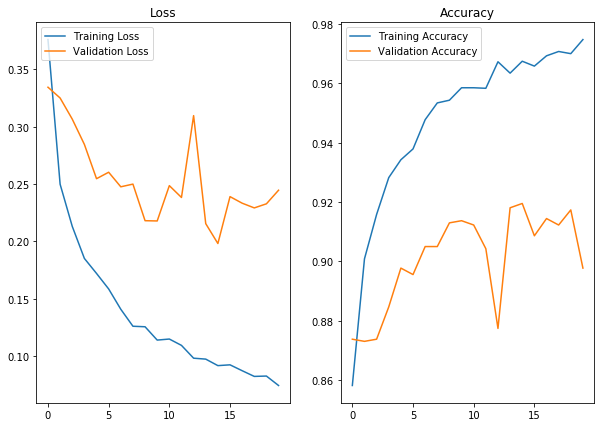

In [11]:
''' Visualize the training/validation loss and training/validation accuracy'''
from pylab import rcParams

rcParams['figure.figsize'] = 10, 7

loss = history.history.get('loss')
val_loss = history.history.get('val_loss')

acc = history.history.get('acc')
val_acc = history.history.get('val_acc')
    
plt.figure(0)

plt.subplot(121)

plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Loss')


plt.subplot(122)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy')

plt.show()